(particionGraficoDQM)=
# Partición de un gráfo con DQM

El objetivo de este ejercicio es conseguir una partición de un grafo, de tal manera que los subconjuntos obtenidos tengan el mismo número de nodos y las conexiones entre los subgrupos sean las menos posibles. Es un ejercico [similar al que se ve en este enlace](particion_partes_iguales_grafo), pero en este caso utilizando DQM.

Comenzamos cargando los módulos que vamos a necesitar

In [1]:
from dimod import DiscreteQuadraticModel, ExactDQMSolver
from itertools import combinations
import networkx as nx

## Partción del grafo en más de dos subconjuntos.

Creamos el grafo con el que vamos a trabajar

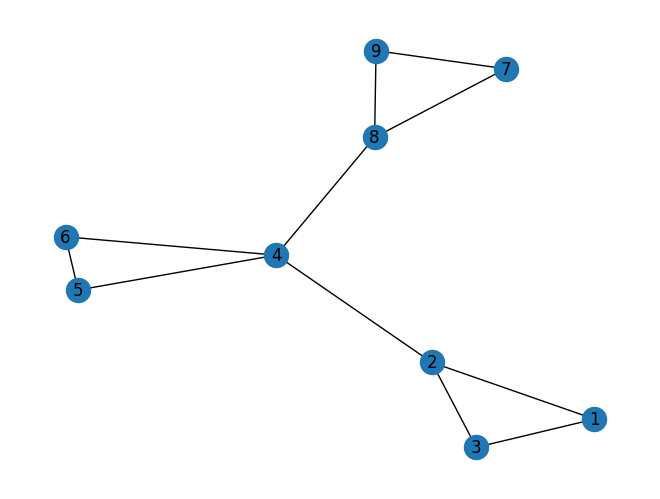

In [2]:
edges = [
    (1, 2), (2, 3), (1, 3), 
    (4, 5), (5, 6), (4, 6), 
    (7, 8), (8, 9), (7, 9),
    (2, 4), (4, 8)
]
nodes = sorted(set().union(*edges))
graph = nx.Graph(edges)
nx.draw(graph, with_labels=True)

## Variables de decisión

Para este jercicio, asignamos variables $x_{i,k} por cada noro $i$ y conjunto de vértices $k$. Toma el valor 1 si el nodo $i$ está en el conjunto $k$.

Creamos las variable discretas de la siguiente manera

In [3]:
dqm = DiscreteQuadraticModel()

m = 3
n = len(nodes)

for node in nodes:
    dqm.add_variable(m, node)

##  Objectivo

En lugar de penalizar dos nodos que no son del mismo conjunto, recompensamos si

- dos nodos pertenecen al mismo conjunto y
- los dos nodos están conectados

  $$\sum_a\sum_b -x_{a.k}x_{b,k}~~~\forall k$$

In [4]:
for a, b in edges:
    for k in range(m):
        dqm.set_quadratic_case(a, k, b, k, -1)   

## Restricciones

El tamaño de cada conjunto debe ser igual a n/m

- n es el núemro de nodos
- 
- m es el número de conjuntos que queremos tener

In [5]:
for k in range(m):
    dqm.add_linear_equality_constraint(
        [(i, k, 1.0) for i in nodes],
        constant=-n/m,
        lagrange_multiplier=10
    )    

Cada nodo sólo puede pertenecer a un conjunto. Esto lo gestionan de forma natural el objeto DQM y todos los solucionadores DQM.

In [6]:
res = ExactDQMSolver().sample_dqm(dqm).truncate(10)
print(res)

  1 2 3 4 5 6 7 8 9 energy num_oc.
0 2 2 2 0 0 0 1 1 1   -9.0       1
1 2 2 2 1 1 1 0 0 0   -9.0       1
2 1 1 1 0 0 0 2 2 2   -9.0       1
3 0 0 0 1 1 1 2 2 2   -9.0       1
4 0 0 0 2 2 2 1 1 1   -9.0       1
5 1 1 1 2 2 2 0 0 0   -9.0       1
6 2 2 2 0 1 1 1 0 0   -6.0       1
7 0 0 0 1 2 2 2 1 1   -6.0       1
8 0 0 0 1 1 2 2 1 2   -6.0       1
9 0 1 1 1 0 0 2 2 2   -6.0       1
['INTEGER', 10 rows, 10 samples, 9 variables]


In [7]:
sample = res.first.sample
sample

{1: 2, 2: 2, 3: 2, 4: 0, 5: 0, 6: 0, 7: 1, 8: 1, 9: 1}

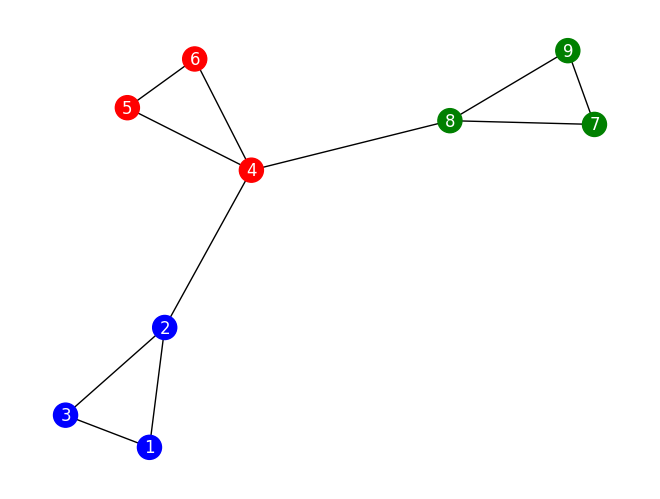

In [8]:
colors = ['r', 'g', 'b']
node_color = [colors[res.first.sample[node]] for node in nodes]
nx.draw(graph, with_labels=True, node_color=node_color, font_color='w')

También se puede resolver utilizando `LeapHybridDQMSampler`

In [ ]:
from dwave.system import LeapHybridDQMSampler

sampler = LeapHybridDQMSampler()
res = sampler.sample_dqm(dqm, time_limit=None)
print(res)

In [ ]:
colors = ['r', 'g', 'b']
node_color = [colors[res.first.sample[node]] for node in nodes]
nx.draw(graph, with_labels=True, node_color=node_color, font_color='w')